<a href="https://colab.research.google.com/github/ashwinkhapre/FMML-Projects_Ashwin_Khapre/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4049 - loss: 1.8943 - val_accuracy: 0.8500 - val_loss: 0.6812
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8477 - loss: 0.5314 - val_accuracy: 0.8700 - val_loss: 0.3815
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8720 - loss: 0.3551 - val_accuracy: 0.8900 - val_loss: 0.3471
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9296 - loss: 0.2221 - val_accuracy: 0.9100 - val_loss: 0.2906
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9787 - loss: 0.1337 - val_accuracy: 0.8600 - val_loss: 0.3509
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9855 - loss: 0.0863 - val_accuracy: 0.8600 - val_loss: 0.3255
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9877 - loss: 0.0592 - val_accuracy: 0.9300 - val_loss: 0.2243
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9985 - loss: 0.0257 - val_accuracy: 0.9100 - val_loss: 0.

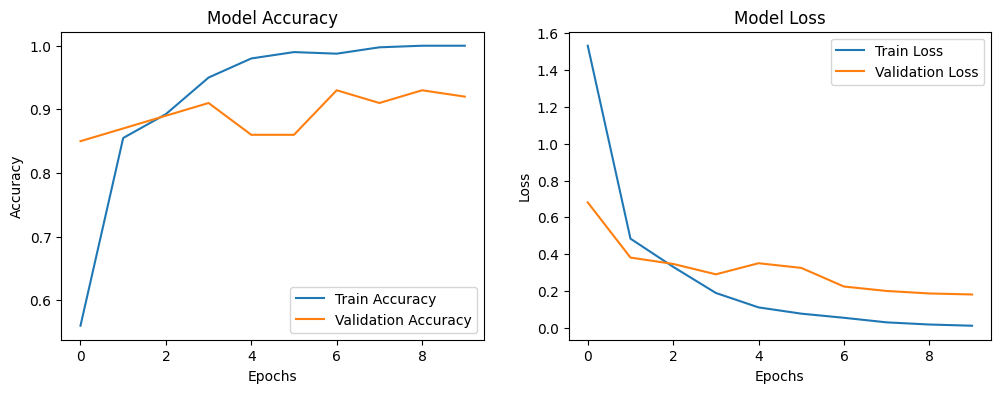

In [1]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to select 50 images of each digit
def get_50_samples_per_digit(X, y):
    x_filtered = []
    y_filtered = []
    for digit in range(10):
        idx = np.where(y == digit)[0][:50]  # Select 50 samples for each digit
        x_filtered.append(X[idx])
        y_filtered.append(y[idx])
    return np.concatenate(x_filtered), np.concatenate(y_filtered)

# Get 50 samples of each digit
x_train_50, y_train_50 = get_50_samples_per_digit(x_train, y_train)

# Normalize the data (0-255 -> 0-1)
x_train_50 = x_train_50.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension (since it's grayscale)
x_train_50 = np.expand_dims(x_train_50, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train_50 = to_categorical(y_train_50, 10)
y_test = to_categorical(y_test, 10)

# Split the 50 samples per digit into training and test sets (80% train, 20% test)
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train_50, y_train_50, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_split, y_train_split, epochs=10, batch_size=16, validation_data=(x_test_split, y_test_split))

# Evaluate performance on the test set
loss, accuracy = model.evaluate(x_test_split, y_test_split)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
